In [39]:
import os
import tarfile
# from six.moves import urllib
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

from sklearn.base import BaseEstimator, TransformerMixin # custom transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR

import joblib

from sklearn.model_selection import GridSearchCV

Voir
* https://github.com/ageron/handson-ml2/tree/master
* ~~https://github.com/ageron/handson-ml~~

## 2.3 Récupérer les données - p 40

### 2.3.2 Télécharger les données - p 43

In [40]:
# download_root = "https:/raw.githubusercontent.com/ageron/handson-ml/master/"
# download_root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"



# # housing_path = "database/housing"
# housing_path = "datasets/housing"
# housing_url = download_root + housing_path + "/housing.tgz"

# def fetch_housing_data (housing_url=housing_url, housing_path=housing_path):
#   if not os.path.isdir(housing_path):
#     os.makedirs(housing_path)
#   tgz_path = os.path.join(housing_path, "housing.tgz")
#   urllib.request.urlretrieve(housing_url, tgz_path)
#   housing_tgz = tarfile.open(tgz_path)
#   housing_tgz.extractall(path=housing_path)
#   housing_tgz.close()  



import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [41]:
fetch_housing_data()

In [42]:
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)


### 2.3.3 Examiner la structure des données - p 44 

In [43]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [44]:
# nb et type des données
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [45]:
# ocean_proximity est un objet
# valeurs discretes
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [46]:
# voir total_bedrooms
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


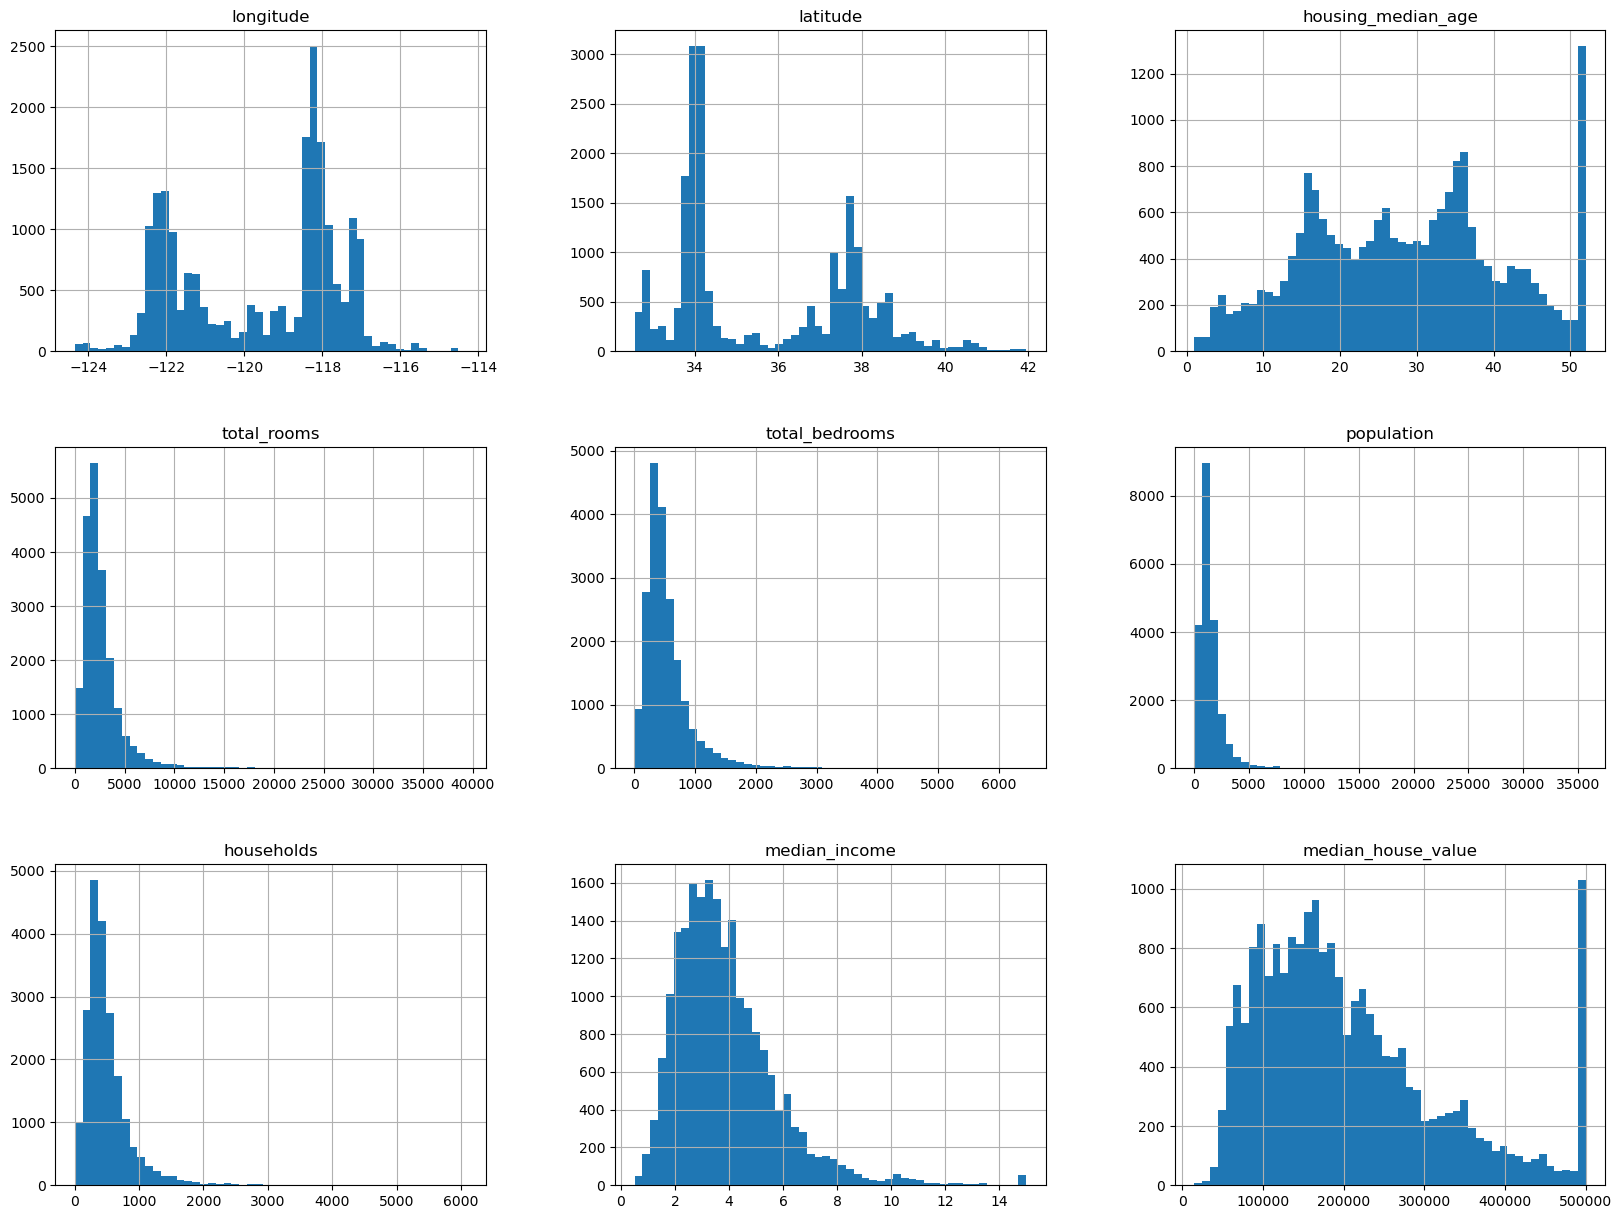

In [47]:
# histogrammes des features
_ = housing.hist(bins=50, figsize=(20,15))

### 2.3.4 Créer un jeu de test - p 48

In [48]:
# np.random.seed(42)

In [49]:
# créer un jeu de test
train_set, test_set = train_test_split (housing, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: >

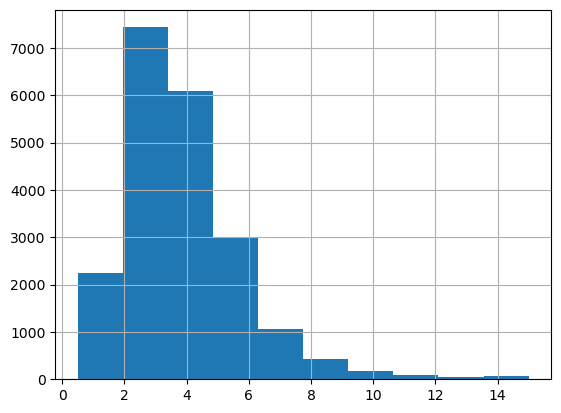

In [50]:
housing["median_income"].hist()

In [51]:
# p 51
# créer une variable qualitative de revenu
# division par 1.5

# housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
# housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
# housing["income_cat"].value_counts()

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

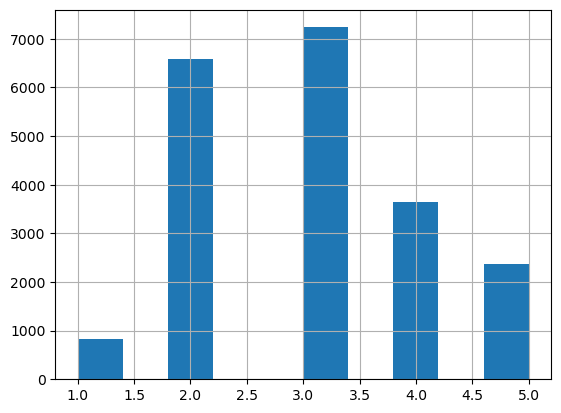

In [52]:
housing["income_cat"].hist()

In [53]:
# échantillonnage stratifié
split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [54]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [55]:
# regarde les modalités dans tout le jeu
housing["income_cat"].value_counts()/len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [56]:
# regarde les modalités dans le train set stratifié
# strat_train_set["income_cat"].value_counts()/len(strat_train_set)

In [57]:
# regarde les modalités dans le train set
# on refait un split sur housing car lors du premier train_test_split y avait pas de catégorie pour le income
# train_set2, test_set2 = train_test_split (housing, test_size=0.2, random_state=42)
# train_set2["income_cat"].value_counts(normalize=True)

In [58]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [59]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [60]:
# Supprime la feature income_cat
for set in (strat_test_set, strat_train_set):
  set.drop(["income_cat"], axis=1, inplace=True)

p52, faut passer du temps sur la génération du jeu de test 

## 2.4 Découvrir et visualiser les données pour mieux les comprendre - p 52

In [61]:
# copie du train set
housing = strat_train_set.copy()

### 2.4.1 Visualisation des données géographiques - p 53

<Axes: xlabel='longitude', ylabel='latitude'>

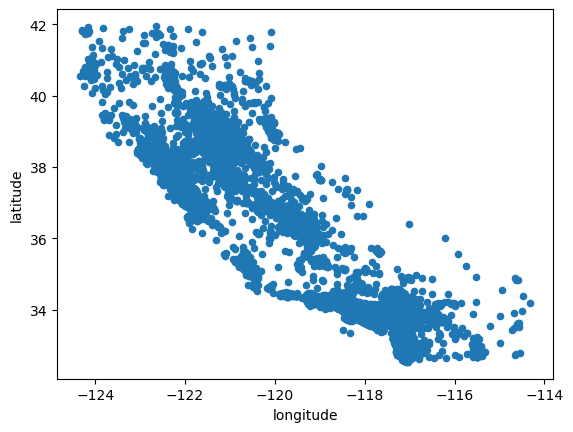

In [62]:
housing.plot(kind="scatter", x="longitude", y="latitude")

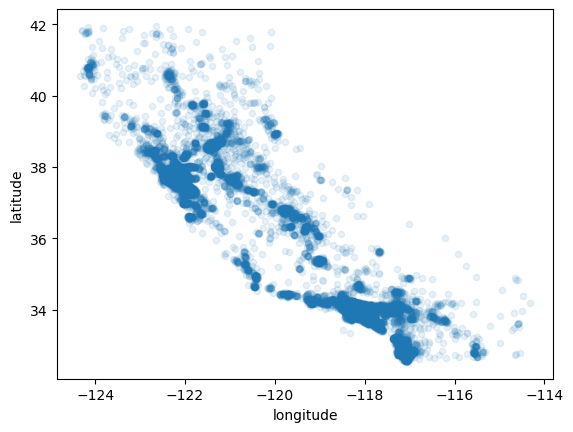

In [63]:
# voir les zones à forte densité
_ = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

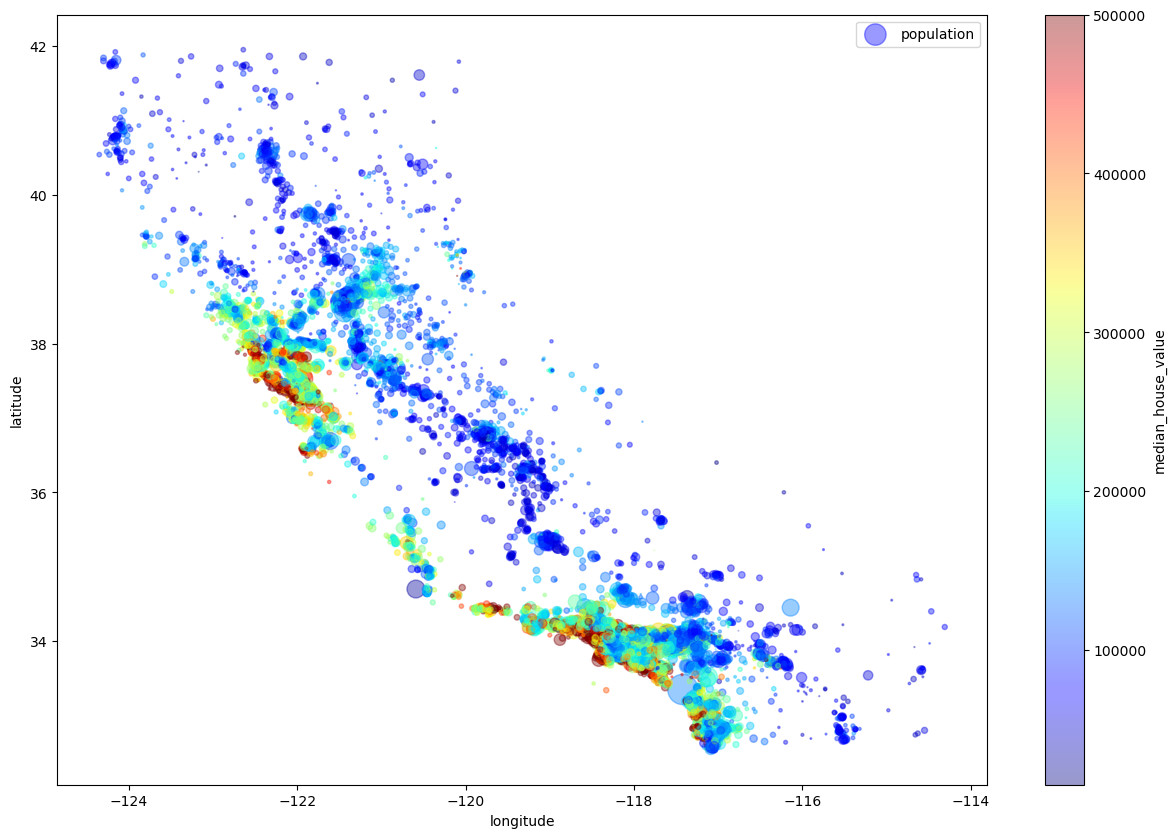

In [64]:
# voir les zones à forte densité
# surface = population disctrict
# couleur = le prix
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
                 s=housing["population"]/75, label="population",
                 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(15,10))
_ = plt.legend()

### 2.4.2 Recherche de corrélation - p 55

In [65]:
# housing.head()
corr_matrix = housing.corr(numeric_only=True)

In [66]:
# Recherche de correlation
# r de Pearson

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

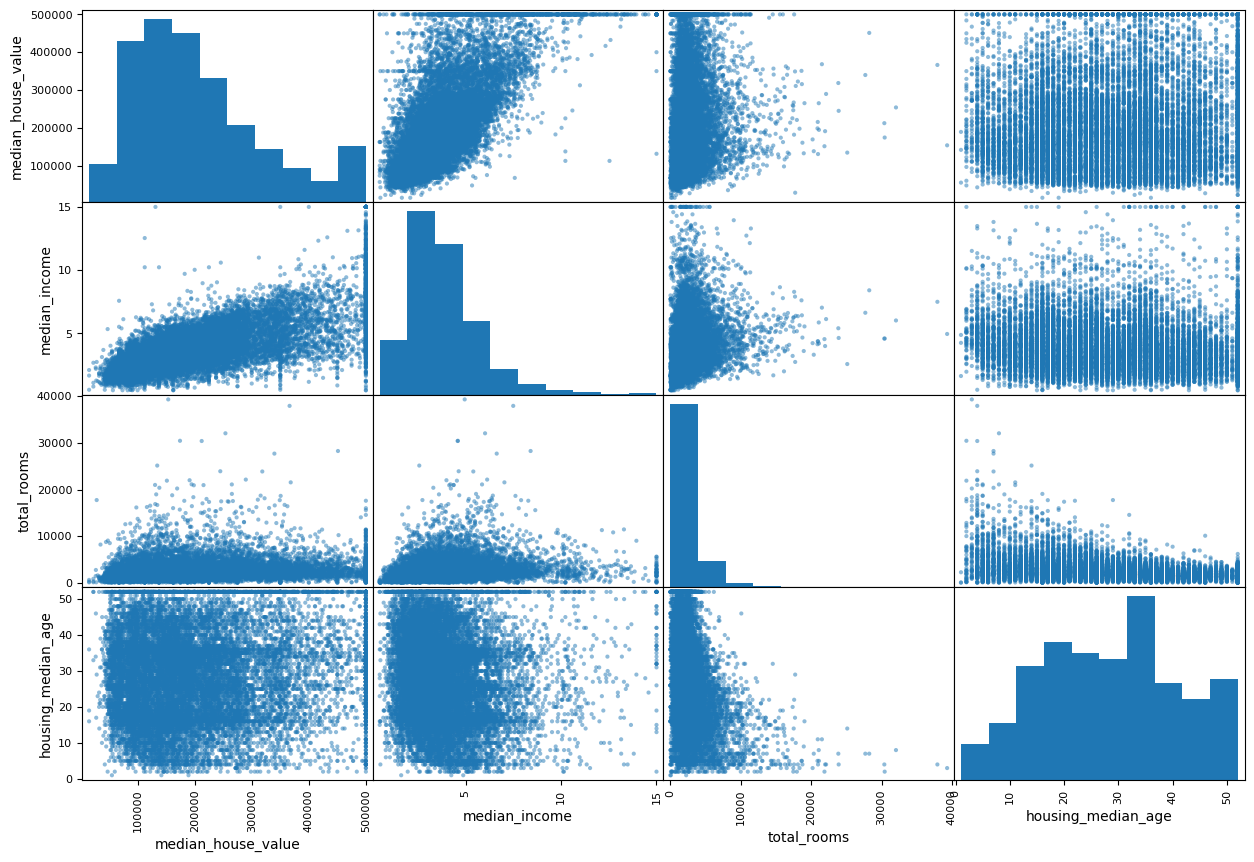

In [67]:
attributes = ["median_house_value",
              "median_income",
              "total_rooms",
              "housing_median_age"]
_ = scatter_matrix(housing[attributes], figsize=(15, 10))

<Axes: xlabel='median_income', ylabel='median_house_value'>

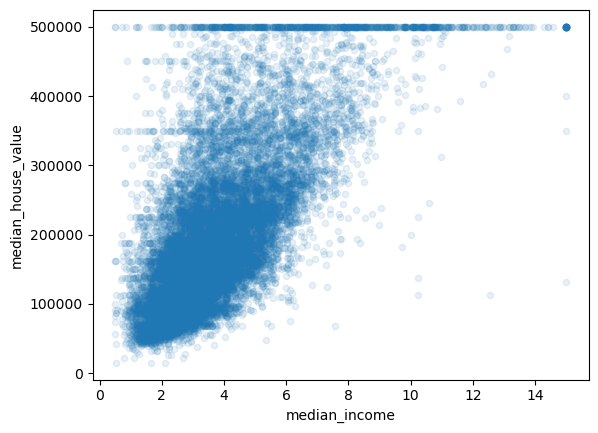

In [68]:
# la variable qui semble prometteuse c'est median_income

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

* corrélation forte
* plafonnement des prix à 500 000$
* y a des lignes à 350 k, 450 k et 280 k

Faudrait supprimer les districts en question pour éviter que l'algo de ML reproduise ces lignes

### 2.4.3 Expérimenter avec des combinaisons de features - p 57

In [69]:
# combiner certaines variables
# on veut pas le nombre de pieces dans le district mais le nb de pice par logement
# on veut comparer le nb de chambre vs nb de pieces
# ...

housing["rooms_per_houshold"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_houlehold"] = housing["population"]/housing["households"]



In [70]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_houshold          0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_houlehold   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

bedrooms_per_room est plus corrélé que total_bedrooms ou total_rooms

In [71]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_houshold,bedrooms_per_room,population_per_houlehold
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## 2.5 Préparer les données - p 58

In [72]:
# On reprend un trainset propre

# housing est une copie du tabelau initial moins la colonne "median_house_value" 
housing = strat_train_set.drop("median_house_value", axis=1)
print("housing :\n", housing.head(5))
print()
# la target c'est juste la colonne "median_house_value" du tableau initial
housing_labels = strat_train_set["median_house_value"].copy()
print("housing_labels :\n", housing_labels)


housing :
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income ocean_proximity  
12655      2237.0       706.0         2.1736          INLAND  
15502      2015.0       768.0         6.3373      NEAR OCEAN  
2908        667.0       300.0         2.8750          INLAND  
14053       898.0       483.0         2.2264      NEAR OCEAN  
20496      1837.0       580.0         4.4964       <1H OCEAN  

housing_labels :
 12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    

### 2.5.1 Nettoyer les données - p 59

In [73]:
# nettoyer
# manque des infos dans la colonne total_bedrooms

# housing.dropna(subset=["total_bedrooms"])
# housing.drop("total_bedrooms", axis=1)
# median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median, inplace=True)


In [74]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [75]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [76]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [77]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [78]:
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [79]:
# il a calculé les médianes et stocké dans statistics_
imputer.statistics_



array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [80]:
# pour info et montrer qu'on retrouve la même chose
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [81]:
X = imputer.transform(housing_num)

In [82]:
# X est un tableau numpy !!!!
# Pour l'injecter dans un dataframe

housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index)
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [83]:
imputer.strategy

'median'

In [84]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [85]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


### 2.5.2 Gérer les données qualitatives - p 61

In [86]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [87]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [88]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [89]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [90]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [91]:
# Si on veut pas une sparce matric
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

c:\Users\phili\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [92]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# # Même opération en 1 fois au lieu de 2
# # Vaut mieux utiliser OneHotEncoder je crois
# cat_encoder = LabelBinarizer()
# # cat_encoder = LabelBinarizer(sparse_output=True) # si on veut une sparce matrix
# housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# housing_cat_1hot


### 2.5.3 Transformateurs sur mesure - p 63

In [ ]:

# ! Mon erreur était là

In [ ]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6              # Z! hard coding

class CombinedAttributesAdder (BaseEstimator, TransformerMixin):
  def __init__ (self, add_bedrooms_per_room=True): # pas de *args ni **kargs add_bedrooms_per_room est un hyperparamètre
    self.add_bedrooms_per_room = add_bedrooms_per_room
  
  def fit(self, X, y=None):
    return self
  
  def transform(self, X, y=None):
    # rooms_per_household = X[:, population_ix]/X[:, household_ix]
    rooms_per_household = X[:, rooms_ix]/X[:, household_ix]
    population_per_household = X[:,population_ix] / X[:, household_ix]
    if(self.add_bedrooms_per_room):
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]
  
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)  




# column index
# rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
#     def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
#         self.add_bedrooms_per_room = add_bedrooms_per_room
    
#     def fit(self, X, y=None):
#         return self  # nothing else to do
  
#     def transform(self, X):
#         rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
#         population_per_household = X[:, population_ix] / X[:, households_ix]
#         if self.add_bedrooms_per_room:
#             bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
#             return np.c_[X, rooms_per_household, population_per_household,
#                          bedrooms_per_room]
#         else:
#             return np.c_[X, rooms_per_household, population_per_household]

# attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
# housing_extra_attribs = attr_adder.transform(housing.values)


### 2.5.4 Recalibrage des variables - p 64
* feature scaling
* pas obligé de calibrer les valeurs cibles

1. min max scaling = normalization = tout est entre 0 et 1 = via MinMaxScaler
1. standardization = moyenne nulle, ecart type de 1 = pas entre 0 et 1 = via StandardScaler

En réseau de neurones on veut des val entre 0 et 1

### 2.5.5 Pipeline de transformation - p 65

In [ ]:
housing_num.describe()

In [ ]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
print(housing_num_tr)



In [ ]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared

In [ ]:
housing_prepared.shape

## 2.6 Sélectionner et entrainer un modèle - p 66

### 2.6.1 Entrainement et évaluation sur le jeu d'entrainement - p 67

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

In [ ]:
# test sur données de train
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Prédiction", lin_reg.predict(some_data_prepared))
print("Etiquettes", list(some_labels))

In [ ]:
# les résultats sont pas top
# calcul RMSE
housing_predictions = lin_reg.predict(housing_prepared)
#lin_mse = mean_squared_error(housing_labels, housing_predictions)
#lin_rmse = np.sqrt(lin_mse)
lin_rmse= mean_squared_error(housing_labels, housing_predictions, squared=False)
lin_rmse


* median_housing_value varie entre 120k et 265k
* 68k d'erreur c'est pas top

* Test avec un DecisionTreeRegressor
    * Peut trouver des relations linéraires complexes

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


* Bizarre
* Sur entrainement
* On va utiliser une partie du trainset pour entrainement et une autre pour valider

### 2.6.2 Améliorer l'évaluation par la validation croisée - p 68
On pourrait faire un train_test_split() sur le trainset
On va faire une validation croisée en K passes (K fold cross validation)

* La validation croisée de sklearn nécessite une fonction d'utilité où les variables élevées sont préférables
* plutôt qu'in fonction de coût (où les valeurs basses sont préférables)
* la fonction choisie est l'opposée de rmse
* pour la rmse des scores on évalue sqrt de (-scores)

#### Evaluation du TreeDecisionRegressor

In [ ]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores) # fonction d'utilité (val hautes recherchées). On prend l'oposé de la MSE

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Les rmse de la liste scores sont maintenant moins bonnes que la rmse de la regression lineaire...

#### On vérifie Linear Regression

In [ ]:
# Pour vérifier ce que cela donne avec régression linéaire
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

#### On teste RandomForestRegressor (Z! 46 secondes)

In [ ]:
#forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

### Z! ATTENTION : prend 8 min pour s'exécuter

In [ ]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)


display_scores(forest_rmse_scores)

* Le model est toujours en overfitting (p 69)
* Pour résoudre le pb il faut le simplifier, imposer des contraintes, obtenir plus de data...



In [ ]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

#### Tester SVM


In [ ]:
svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

### Sauvegarder les modèles

In [ ]:
# sauver
# les hyper paramètres
# les paramètres entrainés
# les scores de validation croisées
# les prédictions obtenues (peut être)

# joblib.dump(my_model, "my_model.pkl") 
#...
# my_model_loaded = joblib.load("my_model.pkl") 

## 2.7 Regler le modèle - p 70

### 2.7.1 Recherche par quadrillage - p 70

* On précise les hyper paramètres à faire varier
* La gamme de valeurs

In [ ]:
# param_grid=[
#   # try 12 (3×4) combinations of hyperparameters
#   {"n_estimators":[3, 10, 30], "max_features" : [2, 4, 6, 8]},
#   # then try 6 (2×3) combinations with bootstrap set as False
#   {"bootstrap": [False], "n_estimator":[3,10], "max_features":[2, 3, 4]},
# ]

# forest_reg = RandomForestRegressor(random_state=42)
# # train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
# grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
#                            scoring="neg_mean_squarred_error",
#                            return_train_score=True)
# grid_search.fit(housing_prepared, housing_labels)

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

### 2.7.2 Recherche aléatoire - p 72
* Si l'espace de recherche dans les hyperparamètres est restreint => GridSearchCV
* Si l'espace de recherche dans les hyperparamètres est large => RandomizedSearchCV
    * Va utiliser n hyper para différents sans se restreindre aux valeurs passées
    * On fixe nous même le nb de test. Donc le temps et le cout

### 2.7.3 Méthode d'ensemble - p 73
* On combine les modèles qui donnent les meilleurs résultats

### 2.7.4 Analyser les meilleurs modèles et leurs erreurs - p 73

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
# # affiche les scores et les noms
# extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
# #cat_one_hot_attribs = list (encoder.classes_)
# cat_encoder = full_pipeline.named_transformers_["cat"]
# #attributes = num_attribs+extra_attribs+cat_one_hot_attribs
# cat_one_hot_attribs = list(cat_encoder.categories_[0])
# sorted(zip(feature_importances, attributes), reverse=True)


extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

* On peut choisir de supprimer des catégories
* Par exemple, ici y a une seule valeur de ocean_proximity qui est utile


### 2.7.5 Evaluer sur le jeu de test - p 74

In [ ]:
# final_model = grid_search.best_estimator_
# X_test = strat_test_set.drop("median_house_value", axis=1)
# y_test = strat_test_set["median_house_value"].copy()

# X_test_prepared = full_pipeline.transform(X_test)

# final_predictions = final_model.predict(X_test_prepared)
# final_mse = mean_squared_error(y_test, final_predictions)
# final_rmse = np.sqrt(final_mse)


final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse